FileUpload(value={'2. Diagnose Diabetes.csv': {'metadata': {'name': '2. Diagnose Diabetes.csv', 'type': 'text/…

Dataset uploaded successfully!
Columns found: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Model trained. Accuracy: 74.03%


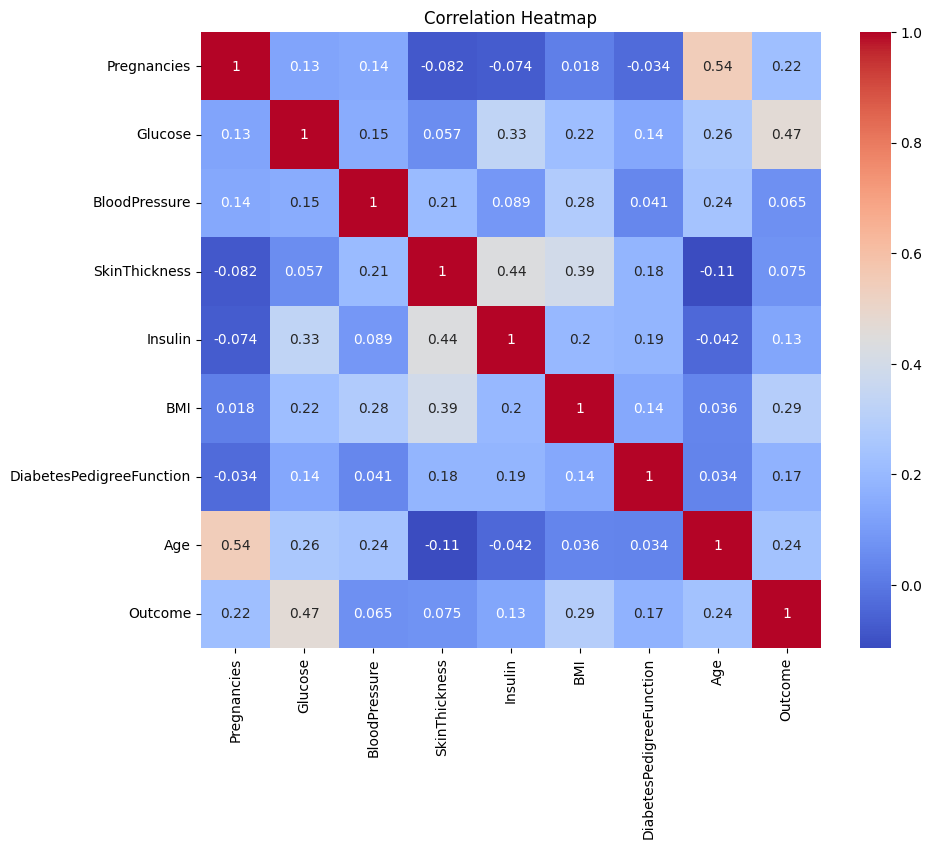

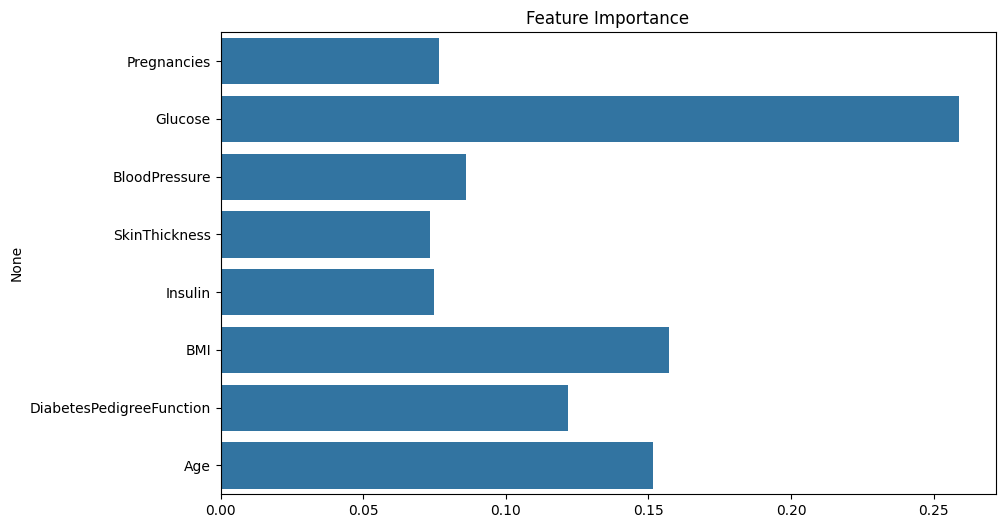

Button(description='Predict', style=ButtonStyle())


Prediction: Not Diabetic (Confidence: 2.00%)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Prediction: Not Diabetic (Confidence: 1.00%)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from io import BytesIO

import ipywidgets as widgets
from IPython.display import display, clear_output

# File upload widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    clear_output(wait=True)
    display(upload_widget)

    if upload_widget.value:
        uploaded_file = next(iter(upload_widget.value.values()))
        df = pd.read_csv(BytesIO(uploaded_file['content']))

        print("Dataset uploaded successfully!")
        print("Columns found:", df.columns.tolist())

        if 'Outcome' not in df.columns:
            print("The dataset must contain an 'Outcome' column.")
            return

        # Train model
        X = df.drop('Outcome', axis=1)
        y = df['Outcome']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        print(f"Model trained. Accuracy: {accuracy_score(y_test, model.predict(X_test)) * 100:.2f}%")

        # Plot correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x=model.feature_importances_, y=X.columns)
        plt.title("Feature Importance")
        plt.show()

        # Generate input widgets
        input_widgets = {col: widgets.FloatText(description=col) for col in X.columns}
        input_box = widgets.VBox(list(input_widgets.values()))
        predict_button = widgets.Button(description="Predict")

        def predict_callback(btn):
            input_values = [widget.value for widget in input_widgets.values()]
            prediction = model.predict([input_values])[0]
            prob = model.predict_proba([input_values])[0][1]

            result = "Diabetic" if prediction == 1 else "Not Diabetic"
            print(f"\nPrediction: {result} (Confidence: {prob * 100:.2f}%)")

        predict_button.on_click(predict_callback)
        display(input_box, predict_button)

# Handle file upload event
upload_widget.observe(handle_upload, names='value')

